In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(1) 한 공장에서 생산된 제품에서 최근 추정 불량률은 90% 였다. 오차의 한계가 5% 이하가 되도록 하는 최소표본사이즈를 구하시오.

- 정규분포를 따른다고 가정한다. 이때 모평균은 0.9 으로 표본분산은 0.9 * 0.1이며, 양측검정 0.95 에 대해 z 값은 1.96 이다 

In [14]:
# x - t * s/np.sqrt(n) < 모평균 < x + t*s/np.sqrt(n)

# s = np.sqrt(0.9*0.1)

# 1.96*s/(np.sqrt(n)) <= 0.05
# np.sqrt(n) >= 1.96*s / 0.05

n = 1.96**2 * (0.9*0.1) / 0.05**2
n

138.29759999999996

2. 다음은 1월부터 9월까지의 은의 가격이다.

(1) 은의 가격 및 이동편균값 3이 설정된 시계열 그래프를 그리시오.

In [20]:
df = pd.DataFrame({'month' : [1,2,3,4,5,6,7,8,9], 'price_of_silver': [12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38]})

df.set_index('month', inplace=True)

In [22]:
df

,price_of_silver
month,
1,12.14
2,42.60
3,34.40
4,35.29
5,30.96
6,57.12
7,37.84
8,42.49
9,31.38


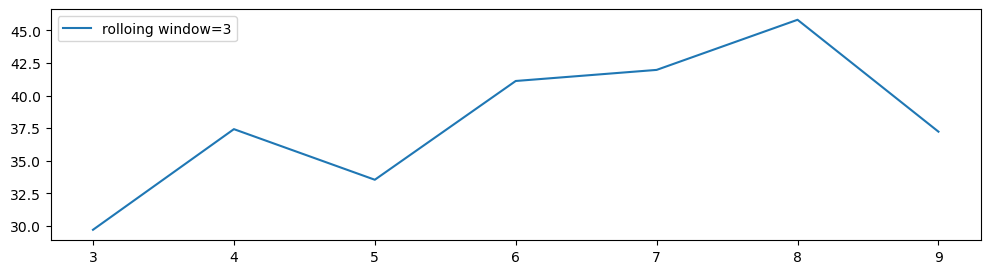

In [24]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(12,3))

rw3 = df.rolling(window=3).mean().dropna()

ax.plot(rw3, label ='rolloing window=3')
plt.legend()
plt.show()

In [26]:
rw3

,price_of_silver
month,
3,29.713333
4,37.430000
5,33.550000
6,41.123333
7,41.973333
8,45.816667
9,37.236667


(2) 1월 대비 9월의 은의 가격은 몇% 올랐는가?

In [36]:
round(31.38/12.14*100,1)

258.5

258.5 % 상승함.

3. 아래 그래프는 A,B,C 자치구별 H의원에 대한 찬성, 반대, 투표 결과이다. 자치구별 지지율이 같은지에 대해서 검정하시오.

In [42]:
# 동질성 검사를 시행한다. 

table = pd.DataFrame({'찬반' : ['찬성', '반대'], 'A': [176, 124], 'B':[193, 107], 'C':[159,141]}).set_index('찬반')
test_a = 0.05
table

,A,B,C
찬반,,,
찬성,176,193,159
반대,124,107,141


In [44]:
# H0: 자치구별 선호도에 차이가 없다.
# H1: 적어도 한 집단은 차이가 있다.

ttl = table.sum().sum()
exp = []
r = table.sum(axis=1).values
c = table.sum(axis=0).values
for R in r:
    for C in c:
        exp.append(R*C/ttl)

obs = table.values.ravel()

from scipy.stats import chi2

chistat = np.sum((obs - exp)**2 /exp)
df = (table.shape[0]-1)*(table.shape[1]-1)
sp = 1 - chi2.cdf(chistat, df)
cv = chi2.ppf(1-test_a, df)


In [46]:
print(cv, chistat, sp)

5.991464547107979 7.945381231671554 0.018822720232146817


In [48]:
from scipy.stats import chi2_contingency 
chi2, p, df, expec = chi2_contingency(table, correction=False)
print(chi2, p, df, expec)

7.945381231671554 0.01882272023214683 2 [[176. 176. 176.]
 [124. 124. 124.]]


p 값이 0.01882272023214683 로 0.05 이하이므로 대립가설을 채택한다. 즉 적어도 한 집단은 지지율이 다르다. 

4. A 학교 남녀학생들의 평균 혈압 차이가 있는지 여부에 대한 검정하시오. (단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.)



(1) 남녀 학생들의 평균 혈압차이가 있는지에 대해 가설을 설정하시오.

H0: 귀무가설 : 남녀 학생들의 평균 혈압차이가 없다.

H1: 대립가설 : 남녀 학생들의 평균 혈압차이가 있다.

(2) 검정통계량을 구하고 판단하시오. 

두개의 독립된 모집단의 평균을 비교하므로 독립표본 t-test 를 시행한다.

In [63]:
df = pd.read_csv('26_problem6.csv')
df

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0
5,male,83.9
6,male,91.2
7,male,103.2
8,male,83.0
9,male,101.2


In [65]:
df_male = df.loc[df['gender']=='male', :]['pressure']

In [67]:
df_male

0     106.8
1     100.8
2      84.5
3     104.2
4     107.0
5      83.9
6      91.2
7     103.2
8      83.0
9     101.2
10     97.1
11     90.9
12     85.2
13    106.2
14    103.1
15     91.2
Name: pressure, dtype: float64

In [69]:
df_female = df.loc[df['gender']=='female', :]['pressure']
df_female

16     92.7
17     90.1
18     83.1
19     83.2
20     85.3
21     82.8
22    108.8
23     87.4
24    104.9
Name: pressure, dtype: float64

In [73]:
import scipy.stats as stats
stats.ttest_ind(df_male, df_female)

TtestResult(statistic=1.3813481801194591, pvalue=0.18044550626193734, df=23.0)

검정통계량은 1.3813481801194591이다.

p-value 는 0.05 보다 크기때문에 귀무가설을 기각할 수 없다. 따라서 남학생과 여학생의 혈압차이가 있다고 할 수 없다. 

(3) 평균 혈압차의 신뢰구간을 구했을 때, 판단한 결과가 (2)의 결과를 지지하는 지 설명하시오. 

In [84]:
m = df_male.mean()
f = df_female.mean()
m, f

(96.21875, 90.92222222222222)

In [96]:
m-f 

5.296527777777783

In [102]:
from scipy.stats import t
conf_a =0.05
d = m-f
df = len(df_male) + len(df_female) -2 
pv = (df_male.var()*(len(df_male)-1) + df_female.var()*(len(df_female)-1)) / df
SE = np.sqrt(pv) * np.sqrt(1/len(df_male) + 1/len(df_female))

CI = t.interval(1-conf_a, df, d, SE)

In [104]:
CI

(-2.635362714413927, 13.228418269969492)

유의수준 95% 에서 신뢰도 구간이 0을 포함한다. 따라서 두 분포간 차이가 있다고 할 수 없다는 (2)의 결과를 지지한다. 

5. Height(키), Weight, Waist 컬럼을 가진 problem7.csv 파일을 가지고 다음을 분석하시오. A시의 20대 남성 411명을 임의로 추출한 후 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다. 이 데이터를 이용하여 남성의 키와 허리둘레가 체중에 영향을 미치는 지 알아보시오. 

In [110]:
da = pd.read_csv('26_problem7.csv')

In [112]:
da

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
...,...,...,...
406,174.207,73.736,80.1779
407,174.702,74.529,80.1306
408,176.858,76.083,80.4527
409,175.566,76.459,80.2019


In [114]:
from sklearn import linear_model
help(linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model - A variety of linear models.

PACKAGE CONTENTS
    _base
    _bayes
    _cd_fast
    _coordinate_descent
    _glm (package)
    _huber
    _least_angle
    _linear_loss
    _logistic
    _omp
    _passive_aggressive
    _perceptron
    _quantile
    _ransac
    _ridge
    _sag
    _sag_fast
    _sgd_fast
    _stochastic_gradient
    _theil_sen
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(sklearn.utils._estimator_html_repr._HTMLDocumentationLinkMixin, sklearn.utils._metadata_requests._MetadataRequester)
        sklearn.linear_model._huber.HuberRegressor(sklearn.linear_model._base.LinearModel, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
        sklearn.linear_model._logistic.LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
            sklearn.linear_model._logistic.LogisticRegressionCV(skle

In [116]:
# sklearn.linear_model._bayes.ARDRegression(sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
from sklearn.linear_model._bayes import ARDRegression
help(ARDRegression)

Help on class ARDRegression in module sklearn.linear_model._bayes:

class ARDRegression(sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ARDRegression(*, max_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, threshold_lambda=10000.0, fit_intercept=True, copy_X=True, verbose=False)
 |  
 |  Bayesian ARD regression.
 |  
 |  Fit the weights of a regression model, using an ARD prior. The weights of
 |  the regression model are assumed to be in Gaussian distributions.
 |  Also estimate the parameters lambda (precisions of the distributions of the
 |  weights) and alpha (precision of the distribution of the noise).
 |  The estimation is done by an iterative procedures (Evidence Maximization)
 |  
 |  Read more in the :ref:`User Guide <bayesian_regression>`.
 |  
 |  Parameters
 |  ----------
 |  max_iter : int, default=300
 |      Maximum number of iterations.
 |  
 |      .. versionchanged:: 1.3
 |  
 |  tol : fl

In [120]:
x = da[['height', 'weight']] 
y = da['waistline']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
clf = ARDRegression(n_iter=1000, 